### 1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Elimina del dataframe todas las filas que se correspondan con la clase valor "1".

Ahora, realiza el ejercicio con el nuevo dataframe:

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (modifica, prueba) los argumentos y comenta si modificando algunas de ellas se mejora el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [16]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Data Import

In [2]:
dataframe = pd.read_csv("data/usuarios_win_mac_lin.csv")
print(dataframe.shape)
dataframe.head()

(170, 5)


,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [3]:
df = dataframe[dataframe['clase'] != 1]
print(df.shape)
df[df['clase'] == 1]

(130, 5)


,duracion,paginas,acciones,valor,clase


In [4]:
df.dtypes

duracion    float64
paginas       int64
acciones      int64
valor         int64
clase         int64
dtype: object

## Building the model

In [5]:
# Getting independent and dependent variables

X = df.iloc[:,:len(df.columns) -1].values
y = df['clase'].values.reshape(-1,1)

In [6]:
# Creating model

log_reg = linear_model.LogisticRegression()

In [7]:
# Splitting samples into test and training

seed = 1
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=seed)

In [8]:
# Training the model

log_reg.fit(X_train, y_train)

LogisticRegression()

In [9]:
print('accuracy training data -->', log_reg.score(X_train, y_train))
print('accuracy test data -->', log_reg.score(X_test, y_test))

accuracy training data --> 0.9615384615384616
accuracy test data --> 0.8846153846153846


In [10]:
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

print('training accuracy score -->', accuracy_score(y_train, y_train_pred))
print('test accuracy score -->', accuracy_score(y_test, y_test_pred))

training accuracy score --> 0.9615384615384616
test accuracy score --> 0.8846153846153846


In [11]:
# Accuracy score for class containing elements = 1

X_prev = dataframe.iloc[:, :len(dataframe.columns)-1].values
y_prev = dataframe['clase']

log_reg_prev = linear_model.LogisticRegression()

X_prev_train, X_test_prev, y_prev_train, y_prev_test = model_selection.train_test_split(X_prev, y_prev, test_size=0.2, random_state=1)

log_reg_prev.fit(X_prev_train, y_prev_train)

print('previos exercise training accuracy -->', log_reg_prev.score(X_prev_train, y_prev_train))
print('previos exercise test accuracy -->', log_reg_prev.score(X_test_prev, y_prev_test))

previos exercise training accuracy --> 0.8014705882352942
previos exercise test accuracy --> 0.6176470588235294


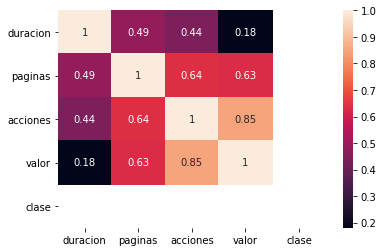

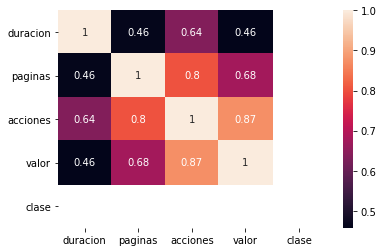

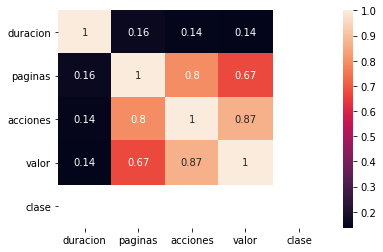

In [12]:
# Checking correlations of columns with respect to each value of class

df_cl_1 = dataframe[dataframe['clase'] == 1]
df_cl_2 = dataframe[dataframe['clase'] == 2]
df_cl_0 = dataframe[dataframe['clase'] == 0]

sb.heatmap(df_cl_1.corr(), annot=True)
plt.show()
sb.heatmap(df_cl_2.corr(), annot=True)
plt.show()
sb.heatmap(df_cl_0.corr(), annot=True)
plt.show()

The algorithm seems to have have improved its accuracy when ommiting clases values equal to 1. The correlation between columns (except for duration) seem to be slightly higher for the clases equal to 0 and 2 than to 1. This might be why our recent model throws better accuracy values than the previous one: there seem to be stronger relations. 

## Model Improvement

### C value

In [17]:
# Tunning para meter C of model

# The values of C to search should be n-equally-spaced values in log space ranging from 1e-5 to 1e5
C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = linear_model.LogisticRegression(random_state=seed, C=c)
    log_reg2.fit(X_prev_train, y_prev_train)
    score = log_reg2.score(X_test_prev, y_prev_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(X_test_prev)
    log_loss2 = log_loss(y_prev_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")

# Log loss is kind of a measure of how well of a prediction is made based on the probability it returns for the model outcomes. As opposed to accuracy level, where a score over a prediction is 1 if it's right, log loss takes into account the probability the model gave to that outcome, therefore, for a same accuracy score, a log loss score wll be lower on the model that gave a higher probability to the right answer (signalling it as a better model). Ex: y_true = cat, y_predict_1 = cat (prob = 0.56), y_predict_2 = cat (prob = 0.83) --> accuracy score- model1 = model2, log loss- model1 > model2
# The lower the log loss the better the model

The CA of C parameter 1e-05 is 0.38235294117647056:
The Logg Loss of C parameter 1e-05 is 1.0652659744698145:

The CA of C parameter 3.359818286283781e-05 is 0.4117647058823529:
The Logg Loss of C parameter 3.359818286283781e-05 is 1.0022661628997693:

The CA of C parameter 0.00011288378916846884 is 0.4411764705882353:
The Logg Loss of C parameter 0.00011288378916846884 is 0.9220015531922097:

The CA of C parameter 0.000379269019073225 is 0.5882352941176471:
The Logg Loss of C parameter 0.000379269019073225 is 0.8552617915744755:

The CA of C parameter 0.0012742749857031334 is 0.6176470588235294:
The Logg Loss of C parameter 0.0012742749857031334 is 0.8257118994817109:

The CA of C parameter 0.004281332398719391 is 0.5882352941176471:
The Logg Loss of C parameter 0.004281332398719391 is 0.7552460027933668:

The CA of C parameter 0.01438449888287663 is 0.5882352941176471:
The Logg Loss of C parameter 0.01438449888287663 is 0.719928483466829:

The CA of C parameter 0.04832930238571752 is

In [18]:
# putting the outcomes in a Table

# reshaping
CA2 = np.array(CA).reshape(20,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(20,)

# zip
outcomes = zip(C_List, CA2, Logarithmic_Loss2)

#df
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'CA2','Logarithmic_Loss2'])

#print
df_outcomes

# Ordering the data (sort_values)
df_outcomes.sort_values("Logarithmic_Loss2", ascending = True).reset_index()

,index,C_List,CA2,Logarithmic_Loss2
0,19,100000.000000,0.705882,0.552803
1,14,233.572147,0.676471,0.560394
2,16,2636.650899,0.647059,0.567236
3,15,784.759970,0.617647,0.570089
4,12,20.691381,0.647059,0.571903
5,11,6.158482,0.617647,0.573550
6,13,69.519280,0.617647,0.574733
7,17,8858.667904,0.617647,0.576119
8,10,1.832981,0.617647,0.581977
9,9,0.545559,0.617647,0.598309


In this case a better accuracy of results matched a low log score. This isn't necessary always the case and it will depend on the data scientist which parameter to follow for assesing how good a model is.

By tweaking the C value we managed to increase the models accuracy to 0.705 approx from 0.618 approx.

### Solver

The solver chooses the algorithm to be used in the optimisation. The ones available are: {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}

In [19]:
# Lets loop through all optimisation algorithms to search for the best outcome

opt_alg_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
CA = []
Logarithmic_Loss = []

for alg in opt_alg_list:
    log_reg2 = linear_model.LogisticRegression(random_state=seed, C=100000, solver=alg)
    log_reg2.fit(X_prev_train, y_prev_train)
    score = log_reg2.score(X_test_prev, y_prev_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(X_test_prev)
    log_loss2 = log_loss(y_prev_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")

The CA of C parameter 100000.0 is 0.6764705882352942:
The Logg Loss of C parameter 100000.0 is 0.5505673289123305:

The CA of C parameter 100000.0 is 0.7058823529411765:
The Logg Loss of C parameter 100000.0 is 0.5528030971845794:

The CA of C parameter 100000.0 is 0.6470588235294118:
The Logg Loss of C parameter 100000.0 is 0.6694486639261709:

The CA of C parameter 100000.0 is 0.4411764705882353:
The Logg Loss of C parameter 100000.0 is 0.8953784560993908:

The CA of C parameter 100000.0 is 0.4411764705882353:
The Logg Loss of C parameter 100000.0 is 0.9085137006521178:



In [22]:
# putting the outcomes in a Table

# reshaping
opt_alg2 = np.array(opt_alg_list).reshape(-1,1)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(-1,1)
CA2 = np.array(CA).reshape(-1,1)
outcomes = zip(opt_alg2, CA2, Logarithmic_Loss2)

#df
df_outcomes = pd.DataFrame(outcomes, columns = ["Opt_alg", 'CA2','Logarithmic_Loss2'])

#print
df_outcomes

# Ordering the data (sort_values)
df_outcomes.sort_values("CA2", ascending = False).reset_index(drop=True)

,Opt_alg,CA2,Logarithmic_Loss2
0,[lbfgs],[0.7058823529411765],[0.5528030971845794]
1,[newton-cg],[0.6764705882352942],[0.5505673289123305]
2,[liblinear],[0.6470588235294118],[0.6694486639261709]
3,[sag],[0.4411764705882353],[0.8953784560993908]
4,[saga],[0.4411764705882353],[0.9085137006521178]


Since the deffault optimisation algorithm was 'lbfgs' and was the highest scoring one of them all, we didn't mannage to increase the models accuracy. It is worth noticing that the log loss is actually lower for the 'newton-cg' algorithm.